RESPUESTAS TEÓRICAS:

- ¿Qué es un paradigma de programación?
 Un paradigma de programación corresponde a un marco para la compresión de un problema en particular y la posterior implementación del código.

- ¿En qué se basa la programación orientada a objetos?
 La programación orientada a objetos (POO) corresponde a uno de los paradigmas más utilizados. Su función es modelar el mundo real. Un programa orientado a objetos consiste en ensamblar objetos y hacerlos interactuar entre ellos.

- ¿Cuál es la diferencia entre recursividad e iteración, y cómo se relaciona esto con la notación
big 𝑂?
 La diferencia entre recursión e iteración se basa en su implementación. Por un lado la recursión cuenta con un caso base y posteriormente se llama a si misma varias veces. Por otro lado, la iteración se resuelve utilizando ciclos "for" o "while". La notación Big O se usa para medir el tiempo que tarda en ejecutarse un algoritmo. Respecto a la notación Big O de la iteración, se define según la cantidad de iteraciones del ciclo, siempre que no esté anidado, por lo tanto, una si un ciclo for se repite m veces el orden queda como O(m). La notación Big O de la recursión varía según el tipo de llamado recursivo que se hace, como por ejemplo, si se saltan datos o la cantidad de llamados que se hagan. En base a esto, según la recursión que se realice la notación Big o puede variar en orden.

- Explicar la diferencia de rendimiento entre 𝑂(1) y 𝑂(𝑛)
 EL rendimiento 𝑂(1) a diferencia de 𝑂(𝑛) es constante e independiente del tamaño de la entrada. Además, es el tiempo de algoritmo más rápido. Por otro lado, el rendimiento 𝑂(𝑛),crece linealmente con el tamaño de la entrada. 

- ¿Cómo se calcula el orden en un programa que funciona por etapas?
 En términos de notación Big O, este proceso implica analizar cada etapa del algoritmo por separado y luego determinar cómo se combinan y la complejidad que resulta de dicha combinación. Para el análisis de cada etapa se puede tener en consideración algunos procesos a los cuales ya se tiene definido su orden. Por ejemplo, el caso señalado con la notación de un ciclo for. Otro ejemplo es para el caso de ciclos for anidados, donde el orden vendrá dado por la cantidad de iteraciones  elevado a la cantidad de ciclos anidados.
 
- ¿Cómo se puede determinar la complejidad temporal de un algoritmo recursivo?
 En este caso el análisis temporal viene dado por una ecuación de recurrencia, que considera el caso base y el costo del llamado recursivo al que se denomina relación de recurrencia. Según el tipo de llamado recursivo que se haga, es la forma que tendrá la relación de recurrencia y por tanto determinará el orden de complejidad que tendrá el algoritmo. 


In [31]:
pip install matplotlib


In [32]:
from time import perf_counter
import matplotlib.pyplot as plt


tiempo Camino1: (6, 4.749999789055437e-05)


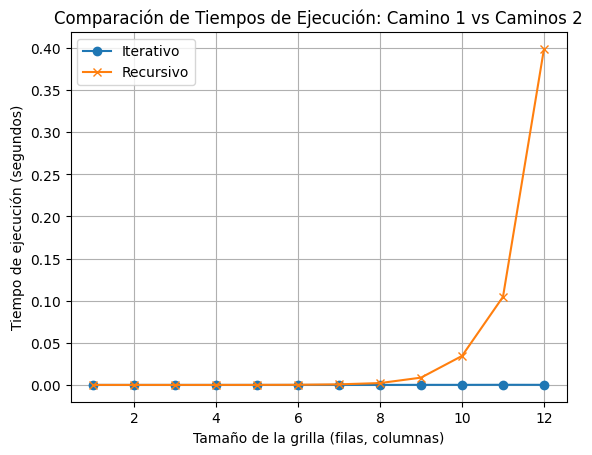

In [33]:
# Decorador para medir el tiempo de ejecución de una función por definir

def medir_tiempo(func):
    

    def envoltura(self, *args, **kwargs):
        #Se da el tiempo de inicio con el contador
        tiempo_inicio = perf_counter()
        #Se define la función a la que se calculará el tiempo con sus argumentos aun desconocidos 
        resultado = func(self, *args, **kwargs)
        #Se calcula el tiempo total teniendo en consideración el tiempo de inicio 
        tiempo_total = perf_counter() - tiempo_inicio
        #Se retorna la función a la que se calculó el tiempo con su correspondiente tiempo
        return resultado, tiempo_total

    
    return envoltura

class PCB:
    #Se inicializa el constructor con las dos carácterísticas de la grilla a la que se le calcularan sus caminos 
    def __init__(self, filas, columnas):
        self.filas = filas
        self.columnas= columnas 

    #Primer método de cálculo de caminos (iterativo). Consiste en poner en cada celda la cantidad de caminos posibles con los que 
    #se podía llegar a dicha celda
    def camino1(self):
        #Crear una grilla de ceros del tamaño de filas y columnas informados 
        grilla = [[0 for _ in range(self.columnas)] for _ in range(self.filas)]

        #Inicializar la primera fila y la primera columna con 1 ya que es dato conocido
        for j in range(self.columnas):
            grilla[0][j] = 1  #Primera fila 

        for i in range(self.filas):
            grilla[i][0] = 1  #Primera columna 

        #Rellenar el resto de las casillas según el número de caminos posibles a aprtir de la suma de los datos ya existentes 
        for i in range(1, self.filas):
            for j in range(1, self.columnas):
                grilla[i][j] = grilla[i-1][j] + grilla[i][j-1]

        #Retornar el número de caminos de la última celda ya que ahí estará la suma total de caminos
        return grilla[self.filas-1][self.columnas-1]
    

    #Segundo método de cálculo de caminos (recursivo).
    def caminos2(self, filas, columnas):
     #Si no se pasan parámetros, usamos los valores de self.filas y self.columnas. En especial util por la recursión.
      if filas == None and columnas == None:
            filas, columnas = self.filas, self.columnas
      #Se define caso base
      if filas == 1 or columnas == 1:
        return 1
      #Llamada recursiva: sumamos los caminos desde la celda de arriba y desde la celda de la izquierda
      return self.caminos2(filas -1, columnas) + self.caminos2(filas, columnas-1)
    
  # Método decorado tal que calcule según el método solicitado.
    @medir_tiempo
    def resolver(self, metodo):
          if metodo == "camino1":
            return self.camino1()
          elif metodo == "caminos2":
            return self.caminos2(self.filas, self.columnas)
          else:
            raise ValueError("Método no válido")    
 
#Ejemplo para verificar que funciona el método con el decorador
matriz = PCB(3,3)
print(f'tiempo Camino1: {matriz.resolver('camino1')}')

#Gráfica tiempos de ejecucación 

def generar_graficos_tiempos():
    valor = range(1, 13)
    tiempos_camino1 = []
    tiempos_caminos2 = []

    for n in valor:
        camino = PCB(n, n)
        resultado1, tiempo1 = camino.resolver('camino1')
        resultado2, tiempo2 = camino.resolver('caminos2')
        tiempos_camino1.append(tiempo1)
        tiempos_caminos2.append(tiempo2)

  
    # Graficar resultados
    plt.plot(valor, tiempos_camino1, label="Iterativo", marker='o')
    plt.plot(valor, tiempos_caminos2, label="Recursivo", marker='x')

    plt.title("Comparación de Tiempos de Ejecución: Camino 1 vs Caminos 2")
    plt.xlabel("Tamaño de la grilla (filas, columnas)")
    plt.ylabel("Tiempo de ejecución (segundos)")
    plt.legend()
    plt.grid(True)
    plt.savefig("grafico_comparativo.svg", format="svg")
    plt.show()

generar_graficos_tiempos()




Del gráfico "Comparación de Tiempos de Ejecución: Camino 1 vs Camino 2" se observa que el método del camino 1 correspondiente a la iteración toma un tiempo de ejecución constante. Por otro lado, el camino 2 correspondiente a la recursión, tiene un tiempo de ejecución que crece exponencialmente.